<a href="https://colab.research.google.com/github/Afitr06/machine_learning/blob/main/explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import pandas as pd
import numpy as np

#visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#add
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [13]:
df = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')
print ('Berikut Tampilan Data :\n')
df.head()

Berikut Tampilan Data :



,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [14]:
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom' )

Dataset memiliki 224 baris dan 7 kolom


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [16]:
cek = pd.DataFrame({
    'Data Kosong': df.isnull().sum(),
    'Data Duplikat': df.duplicated().sum(),
    'Data NaNN': df.isna().sum(),
    'Type Data': df.dtypes
})

cek

,Data Kosong,Data Duplikat,Data NaNN,Type Data
Provinsi,0,0,0,object
Tahun,0,0,0,int64
Produksi,0,0,0,float64
Luas Panen,0,0,0,float64
Curah hujan,0,0,0,float64
Kelembapan,0,0,0,float64
Suhu rata-rata,0,0,0,float64


# Analisa data

In [17]:
df.corr()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
Tahun,1.000000,0.182527,-0.045951,-0.047645,-0.033474,0.004923
Produksi,0.182527,1.000000,0.905622,-0.042129,-0.052316,0.041160
Luas Panen,-0.045951,0.905622,1.000000,-0.092975,-0.061121,0.115726
Curah hujan,-0.047645,-0.042129,-0.092975,1.000000,0.056466,-0.228699
Kelembapan,-0.033474,-0.052316,-0.061121,0.056466,1.000000,-0.407799
Suhu rata-rata,0.004923,0.041160,0.115726,-0.228699,-0.407799,1.000000


In [32]:
#cek korelasi kuat antara Produksi dan Luas Panen
fig = px.scatter(df, x="Luas Panen", y="Produksi", color="Provinsi")
fig.show()

**konklusi** : Ternyata besarann atau jumlah panen produksi disuatu wilayah bergantung pada luas panen / lahan, semakin besar luas maka semakin besar pula hasil panen

In [33]:
total_produksi_prov = df.groupby(['Provinsi'])['Produksi'].sum().sort_values(ascending = False).reset_index()

fig = px.bar(df, y=total_produksi_prov['Produksi'], x=total_produksi_prov['Provinsi'], text_auto='.2s',
             color = total_produksi_prov['Provinsi'])
fig.update_layout(title='Produksi Padi Berdasar Provinsi',
                   xaxis_title='Provinsi',
                   yaxis_title='Jumlah Produksi')
fig.show()

Kota Sumatera Utara paling banyak menghasilkan produksi padi se Sumatera

In [34]:
timeline_prov = df.groupby(['Provinsi','Tahun'] )['Produksi'].sum().reset_index()

fig = px.line(x = timeline_prov['Tahun'], y = timeline_prov['Produksi'],color =timeline_prov['Provinsi'], markers=True)
fig.update_layout(title='Produksi Padi Dari Tahun ke Tahun Berdasarkan Provinsi',
                   xaxis_title='Tahun',
                   yaxis_title='Jumlah Produksi')
fig.show()

Konklusi : Hampir semua provinsi mengalami penurunan panen padi ditahun 2017

# Simple Linear Regression

In [21]:
df.corr()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
Tahun,1.000000,0.182527,-0.045951,-0.047645,-0.033474,0.004923
Produksi,0.182527,1.000000,0.905622,-0.042129,-0.052316,0.041160
Luas Panen,-0.045951,0.905622,1.000000,-0.092975,-0.061121,0.115726
Curah hujan,-0.047645,-0.042129,-0.092975,1.000000,0.056466,-0.228699
Kelembapan,-0.033474,-0.052316,-0.061121,0.056466,1.000000,-0.407799
Suhu rata-rata,0.004923,0.041160,0.115726,-0.228699,-0.407799,1.000000


In [22]:
#Luas Panen memiliki korelasi kuat dengan hasil produksi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#objek model
linreg = LinearRegression()

#Menentukan variable feature dan target
X = np.array(df['Luas Panen']).reshape(-1,1)
y = np.array(df['Produksi'])

#fitting 
linreg.fit(X,y)

#predict
lr_pred = linreg.predict(X)

#r2_score 
print('Test Score (R2 Score):',round(r2_score(y,lr_pred), 4))

Test Score (R2 Score): 0.8202


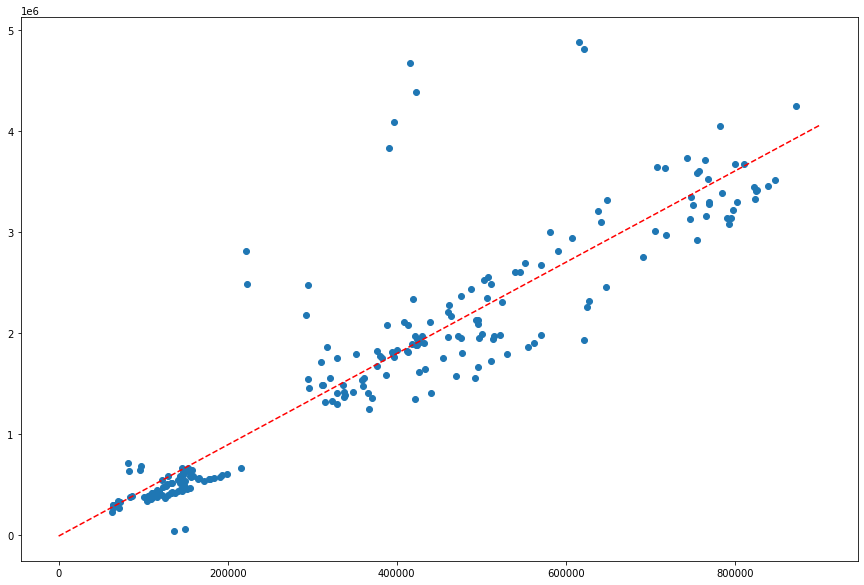

In [23]:
#visualisasi hasil model 
plt.figure(figsize=(15,10))

X_vis = np.linspace(0,900000,1000).reshape(-1,1)
y_vis = linreg.predict(X_vis)
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '--r')

plt.show()

# Multiple Linear Regression

In [24]:
df_copy = df.copy()

In [25]:
#label encode for categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = le.fit_transform(df_copy[col])

In [29]:
#Splitting train and test
from sklearn.model_selection import train_test_split

#Varible target dan feature
X_copy = df_copy.drop(['Produksi'], axis = 1)
y_copy = df_copy[['Produksi']]  

#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X_copy[['Luas Panen']], y_copy, test_size=0.25)

#objek model
model = LinearRegression()

#fitting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r2 score {r2_score(y_test, y_pred)}')

r2 score 0.8192898590534803


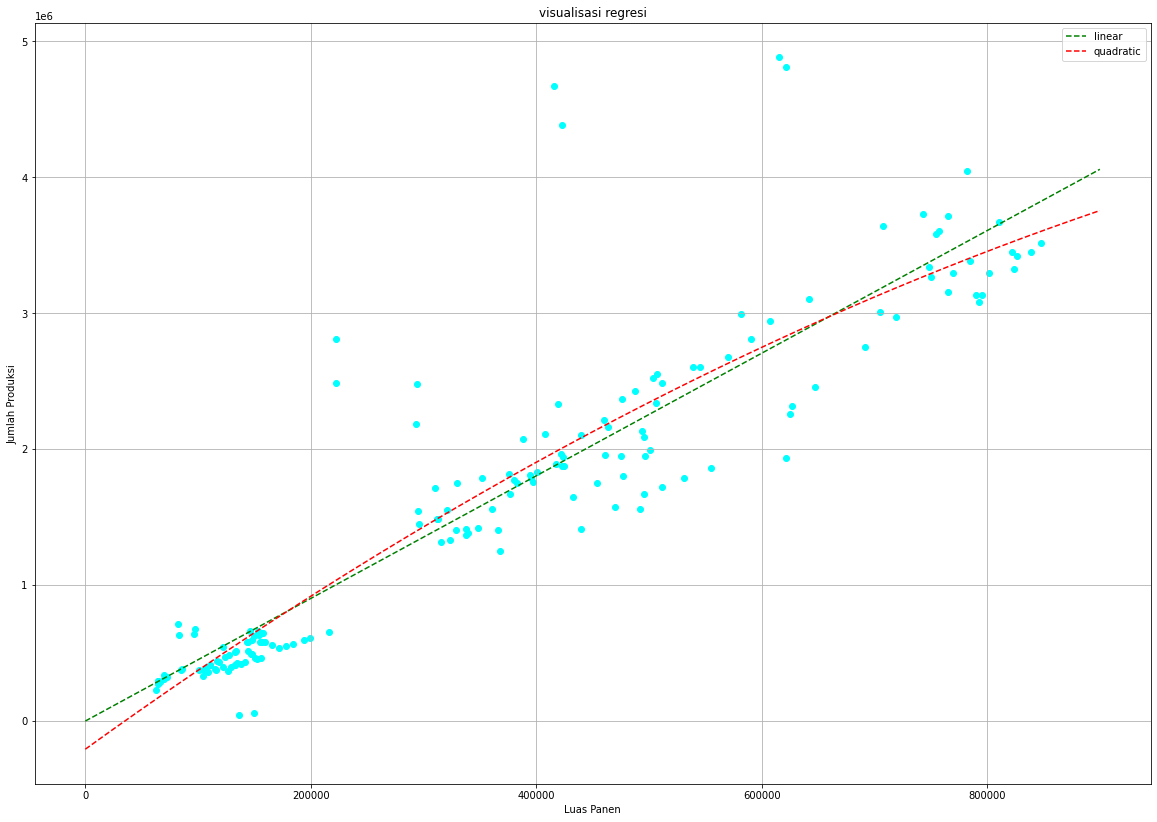

In [31]:
plt.figure(figsize=(20,14))

plt.scatter(X_train, y_train, c='cyan')

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0,900000,1000).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--g', label = 'linear')

# 2 degree
quad_feature = PolynomialFeatures(degree = 2)
X_train_quad = quad_feature.fit_transform(X_train)
model.fit(X_train_quad, y_train)
X_vis_quad = quad_feature.transform(X_vis)
y_vis = model.predict(X_vis_quad)
plt.plot(X_vis, y_vis, '--r', label = 'quadratic')

# 3 degree
# cubic_feature = PolynomialFeatures(degree = 3)
# X_train_cubic = cubic_feature.fit_transform(X_train)
# model.fit(X_train_cubic, y_train)
# X_vis_cubic = cubic_feature.transform(X_vis)
# y_vis = model.predict(X_vis_cubic)
# plt.plot(X_vis, y_vis, '--b', label = 'cubic')

plt.title('visualisasi regresi')
plt.legend()
plt.xlabel('Luas Panen')
plt.ylabel('Jumlah Produksi')
plt.legend()
plt.grid(True)
plt.show()

# Polynomial Feature

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#Varible target dan feature
X_copy = df_copy.drop(['Produksi'], axis = 1)
y_copy = df_copy[['Produksi']]  

#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X_copy[['Luas Panen']], y_copy, test_size=0.25)

X_train_poly = X_train
X_test_poly = X_test

# Transformasi data
quad_feature = PolynomialFeatures(degree = 2)
X_train_quad = quad_feature.fit_transform(X_train_poly)
X_test_quad = quad_feature.fit_transform(X_test_poly)

#Objek Model
model_poly = LinearRegression()
model_poly.fit(X_train_quad, y_train)

#predict
y_pred_train_poly = model_poly.predict(X_train_quad)
y_pred_test_poly = model_poly.predict(X_test_quad)

print(f'r2 score {r2_score(y_test, y_pred_test_poly)}')

r2 score 0.8036837719776937


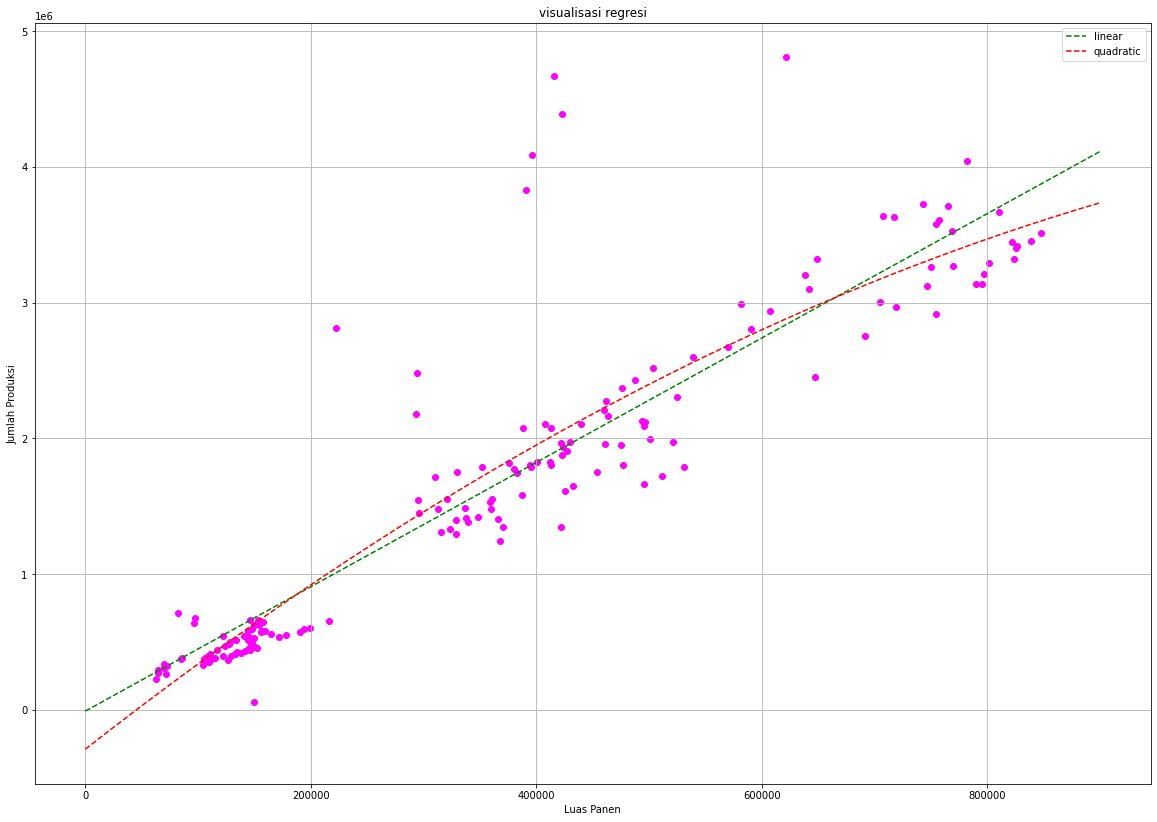

In [28]:
plt.figure(figsize=(20,14))

plt.scatter(X_train, y_train, c='magenta')

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0,900000,1000).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--g', label = 'linear')

# 2 degree
quad_feature = PolynomialFeatures(degree = 2)
X_train_quad = quad_feature.fit_transform(X_train)
model.fit(X_train_quad, y_train)
X_vis_quad = quad_feature.transform(X_vis)
y_vis = model.predict(X_vis_quad)
plt.plot(X_vis, y_vis, '--r', label = 'quadratic')

# 3 degree
# cubic_feature = PolynomialFeatures(degree = 3)
# X_train_cubic = cubic_feature.fit_transform(X_train)
# model.fit(X_train_cubic, y_train)
# X_vis_cubic = cubic_feature.transform(X_vis)
# y_vis = model.predict(X_vis_cubic)
# plt.plot(X_vis, y_vis, '--b', label = 'cubic')

plt.title('visualisasi regresi')
plt.legend()
plt.xlabel('Luas Panen')
plt.ylabel('Jumlah Produksi')
plt.legend()
plt.grid(True)
plt.show()